# Tutorial for processing KOALA data with PyKOALA
# Using PyKOALA KOALA-specific tools
# 1. Intro and generic tasks

In [1]:
# # %% ============================================================================
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------
# # # Load all PyKOALA tasks using  load_PyKOALA.py  / Import PyKOALA 
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------

# # Here we import PyKOALA
# # Ángel just read this file : "/DATA/KOALA/Python/Pablo/load_Pablo_PyKOALA.py" 
# # (now it is a exec command in Spyder, but it just reads  and execute the file importing everything)
# #
# pykoala_load_file = "/DATA/KOALA/Python/Pablo/load_Pablo_PyKOALA.py"
# exec(compile(open(pykoala_load_file, "rb").read(), pykoala_load_file, 'exec'))   # This just reads the file.

# # For making it easier and perhaps happier to whoever is reading this,
# # the pykoala_load_file in Ángel's local folder does the following:

from os import getcwd, chdir
import sys

pykoala_pablo_path = "/DATA/KOALA/Python/Pablo/koala/src/pykoala/"

# # We are running in  []/koala/src/koala/, modules are in koala
# # With this we can run koala packages without importing them
# # Also avoiding including many times the directories in the path

original_system_path =[]
for item in sys.path:
    #print("Original",item)
    original_system_path.append(item)

# # This is from where Python will look for "koala"
sys.path.append(pykoala_pablo_path[:-8])

# Change to PyKOALA folder
original_folder=getcwd() 
chdir(pykoala_pablo_path)
#print("Changing to path", pykoala_pablo_path)

from pykoala import __version__

from pykoala.ancillary import *
from pykoala.cubing import *
from pykoala.data_container import *
from pykoala.rss import *

from pykoala.corrections.astrometry import *
from pykoala.corrections.atmospheric_corrections import *
from pykoala.corrections.correction import *
#from pykoala.corrections.clean_residuals import * 
#from koala.corrections.fix_wavelengths import *   # No funciona
from pykoala.corrections.flux_calibration import *
from pykoala.corrections.sky import *
from pykoala.corrections.throughput import *

from pykoala.exceptions.exceptions import *

from pykoala.instruments.koala_ifu import *
#from pykoala.instruments.koala_cube import *  # ANGEL TESTING WITH CUBES
#from pykoala.instruments.hector_ifu import *
#from pykoala.instruments.weave import *

from pykoala.plotting.plot_plot import * 
from pykoala.plotting.qc_plot import *  
from pykoala.plotting.rss_plot import *  

#from koala.register.registration_ext_source import *  # DOES NOT WORK FOR ANGEL
#from pykoala.register.registration import * 

# ANGEL
from pykoala.spectra.onedspec import *  
from pykoala.corrections.wavelength_corrections import *  


# Return to original folder
chdir(original_folder)
#print("Returning to original path", original_folder)

# Clean the path and leave only what matters
sys.path = []
for item in original_system_path:
    sys.path.append(item)
if pykoala_pablo_path[:-8] not in sys.path: 
    sys.path.append(pykoala_pablo_path[:-8])

# This is something that needs Pablo's PyKOALA for not complaining the plots...
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# # # -----------------------------------------------------------------------------
# # %% ============================================================================
# # # Ignore warnings
# # # -----------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
# #from astropy.utils.exceptions import AstropyWarning
# # #----------------------------------------------------------------

# Prepare the data 
& read RSS files already pre-processed with 2dFdr

In [2]:
aaomega_arms = {'blue': 1, 'red': 2}
aaomega_gratings = {'blue': "580V", 'red': "385R"}

# # Set the folder with the data
path_to_data = '/DATA/KOALA/Jacinda/pablo_data'

# # Set the date for AAT data files
date="27feb"

# # Choose which arm of the spectrograph is going to be used, it is best starting with the RED grating
arm = 'red'

# # If using ccd_1 or ccd_2 as name of folder:
# path_to_filename = f"{path_to_data}/ccd_{aaomega_arms[arm]}"
# # If using name of the gratings as name of folder
path_to_filename = f"{path_to_data}/{aaomega_gratings[arm]}"

# # Check the data that we have in folder path_to_filename using task "list_koala_fits_files_in_folder()"

list_koala_fits_files_in_folder(path_to_filename)


> Listing 2dFdr fits files in folder /DATA/KOALA/Jacinda/pablo_data/385R :

  HD60753          /DATA/KOALA/Jacinda/pablo_data/385R/27feb20025red.fits          15.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20026red.fits          15.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20027red.fits          15.0 s
  HILT600          /DATA/KOALA/Jacinda/pablo_data/385R/27feb20028red.fits          120.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20029red.fits          120.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20030red.fits          120.0 s
  He2-10           /DATA/KOALA/Jacinda/pablo_data/385R/27feb20031red.fits          1200.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20032red.fits          1200.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20033red.fits          1200.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20034red.fits          1200.0 s
            

# Read rss file

The task koalaRSS(filename, rss_object_name = None, path=None, plot_map= False, **kwargs)
creates a KOALA rss object including rss.koala

NOTE: In PyKOALA, options "plot" (for plotting) and "verbose" (for printing in screen what it is doing)
       are always included in **kwargs. Same things for "warnings" (print only warnings)


> Converting KOALA+AAOmega RSS file "/DATA/KOALA/Jacinda/pablo_data/385R/27feb20028red.fits" to a koala RSS object...


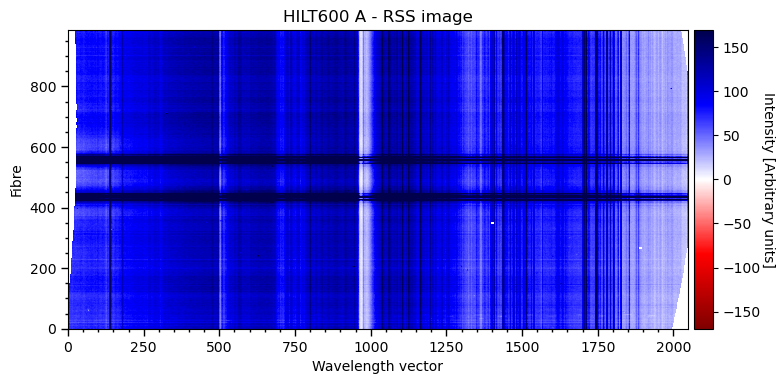

  Found 986 spectra with 2048 wavelengths between 6080.96 and 9305.36 Angstroms.
  This RSS file uses the 385R grating in the red AAOmega arm.
  The KOALA field of view is WIDE: 50.6" x 27.4", with a spaxel size of 1.25" and PA = 89.9º.
  Name of the observation = "HILT600 A",   Name of this Python RSS object = "run28_red".


In [3]:
# # Set obs_number to be read
obs_number = 28 #31-36  galaxy, 28, 29, 30 star 2, 25,26,27 star 1

# # Set variable "filename" jsut with the info of the file (it does not include the path in this example)
filename = f"{date}{aaomega_arms[arm]}00{obs_number}red.fits"        

run28_red = koalaRSS(filename,                         # Name of the file, it could including all full path
                     path = path_to_filename,          # Path to the file (optional, default=None)
                     rss_object_name = "run28_red",    # Name of the rss object to be created (optional, default=None)
                     verbose = True,                   # Print in screen what it is happening (optional, default=False)
                     plot = True)                      # Plot any plot that appears in the process (optional, default=False)

# Check structure of the rss object

In [ ]:
run28_red.wavelength  # Wavelength vector
run28_red.intensity   # Intensity in the form run28_red.intensity[fibre_index,wavelength_index]
run28_red.variance    # Variance in the form run28_red.variance[fibre_index,wavelength_index]
run28_red.info        # Dictionary with general info of the rss
run28_red.koala       # Object including specific koala information and variables

In [4]:
print(run28_red.wavelength)

[6080.9588623  6082.53404462 6084.10922693 ... 9302.20669104 9303.78187335
 9305.35705566]


In [5]:
print(run28_red.intensity)

[[76.03494  85.01237  71.432556 ...       nan       nan       nan]
 [62.802193 51.24656  48.788467 ...       nan       nan       nan]
 [69.09473  70.2224   75.24431  ...       nan       nan       nan]
 ...
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]]


In [6]:
print("Name of this rss :",run28_red.info["name"])        # Name of the observation, as taken at the telescope and included in fits file
print("Exposition time  :",run28_red.info["exptime"])     # Exposition time in s  
print("Airmass          :",run28_red.info["airmass"])     # Airmass
#print(run28_red.info["fib_ra"])     # Absolute RA  position of fibres in sky (lists 986 values), in degrees
#print(run28_red.info["fib_dec"])    # Absolute DEC position of fibres in sky (lists 986 values), in degrees

Name of this rss : HILT600 A
Exposition time  : 120.0
Airmass          : 1.2271963296391781


In [ ]:
Now, check the koala object:

run28_red.koala.info             # Dictionary with KOALA info
run28_red.koala.header           # Header of the fits file
run28_red.koala.wcs              # WCS info (astropy) using header
run38_red.fibre_table            # Original fibre table of the fits file (as given by AAT but removing broken fibres)
run28_red.koala.history          # History of the fits file
run28_red.koala.corrections_done # Corrections done by PyKOALA in this rss file

run28_red.koala.integrated_fibre            # Integrated value of intensity in each fibre (array with 986 values)
run28_red.koala.integrated_fibre_variance   # Integrated value of variance in each fibre (array with 986 values)
run28_red.koala.integrated_fibre_sorted     # List of fibres from LOWEST to HIGHEST integrated value
run28_red.koala.negative_fibres             # List of fibres for which the integrated value of intensity is NEGATIVE


run28_red.koala.mask                        # List of 2 arrays, each on with 986 values. The first array lists the FIRST GOOD value, 
                                            # in wavelength_index, of each fibre, the second array lists the LAST GOOD value of fibre
run28_red.koala.list_fibres_all_good_values # List of fibres where ALL wavelength indeces are GOOD


run28_red.koala.emission_lines_gauss_spectrum                     # Here a 1D spectrum with the emission lines found running Gaussian
                                                                  # fits will be stored
run28_red.koala.redshifted_emission_lines_detected_dictionary     # The dictionary with the redshifted emission lines when created
run28_red.koala.continuum_model_after_sky_correction              # If created, the continuum model after sky correction will be there

In [7]:
# Check KOALA info:
for item in run28_red.koala.info: print(item,":",run28_red.koala.info[item])

rss_object_name : run28_red
path_to_file : /DATA/KOALA/Jacinda/pablo_data/385R/27feb20028red.fits
n_wave : 2048
n_spectra : 986
spaxel_size : 1.25
aaomega_arm : red
aaomega_grating : 385R
aaomega_dichroic : X5700
KOALA_fov : WIDE: 50.6" x 27.4"
position_angle : 89.9177910093928
RA_centre_deg : 101.304946632813
DEC_centre_deg : 2.138343959215929
exptime : 120.0
description : None
valid_wave_min : 6121.91360242502
valid_wave_max : 9226.59794004716
valid_wave_min_index : 26
valid_wave_max_index : 1997
brightest_line : None
brightest_line_wavelength : None
history : None


As well as provide some quick info about KOALA + AAOmega (grating, dichroic, spaxel_size, FoV), this provides:
- The minimum valid wavelength (i.e., it has a value for ALL fibres) is 6121.91360242502 in wavelength index 26
- The maximum valid wavelength (i.e., it has a value for ALL fibres) is 9226.59794004716 in wavelength index 1997
- The brightest emission line we should in this object (typically H-alpha in red and H-beta or [OIII]5007 in blue)
- Its wavelength (redshifted, as measured here)
- history that we will add to the fits file when saved
- We have not provided an extra description for this file (we could if we want)

# Plotting spectra

For plotting a spectrum, we can use task get_spectrum(data_container, fibre=fibre, r=False, **kwargs)

In this example, we will plot the spectrum of the brightest fibre (the title of the plot will tell us its number), also indicating with vertical dashed lines valid_wave_min and valid_wave_max, as well as H-alpha in this star, and shading the region with the strong telluric absorption at ~7600 A.

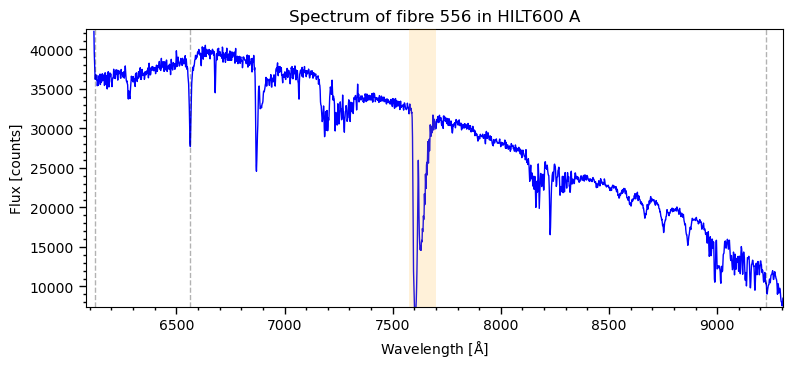

In [5]:
get_spectrum(run28_red,
             fibre = run28_red.koala.integrated_fibre_sorted[-1],       # Brightest fibre
             r = False,                                                 # The spectrum will NOT be returned
             plot=True,                                                 # Plot the spectrum
             axvspan = [[7575,7700]],                                   # Many options in plot_plot go in **kwargs
             vlines=[6563, run28_red.koala.info["valid_wave_min"],
                     run28_red.koala.info["valid_wave_max"]],
             )

We can also plot or obtain a spectrum combining several fibres using plot_combined_spectrum(rss, list_spectra=None, median=False, r=False, **kwargs).

In this example, we add (using median = False) the 10 brightest fibres, and save it in bright_spectrum

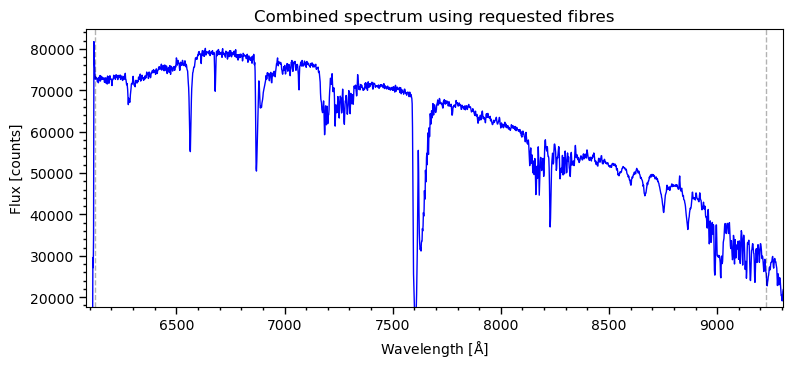

In [6]:
bright_spectrum = get_spectrum(run28_red,
                               list_fibre=run28_red.koala.integrated_fibre_sorted[-10:],  # List of fibres to be combined
                               median=False,                                              # If median = False, we sum all flux
                               plot = True,                                               # Plot it
                               r=True)                                                    # The spectrum WILL be returned

Quick way for plotting: use plot_plot (check info in the plot_plot task for all options)

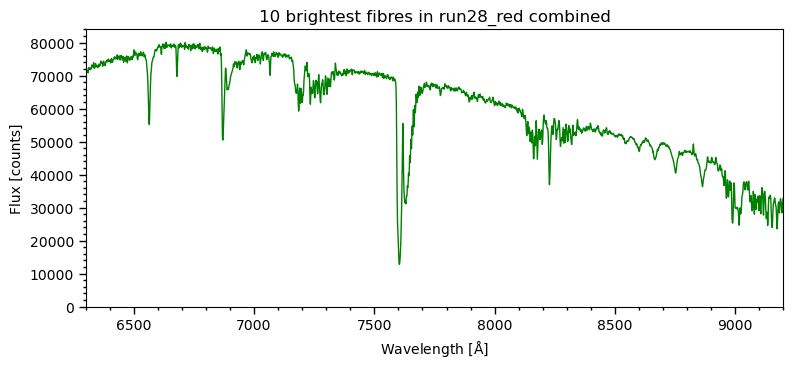

In [32]:
wr = run28_red.wavelength

plot_plot(wr,                                                   # x vector (it can be a list matching the y vectors)
          bright_spectrum,                                      # y vector (or vector list using [spec1, spec2,...]
          ptitle="10 brightest fibres in run28_red combined",   # Title of the plot
          color = "green",                                      # color (or vector with colors matching y vectors)
          xmin =6300, xmax=9200,                                # xmin and xmax: min x and max x to plot
          ymin=0, ymax = 84000,                                 # ymin and ymax: min y and max y to plot (check extra_y = 0)
          extra_y = 0                                           # By default, plot_plot shows 2-98 percentiles + an extra_y = 0.1
          ) 

For showing a plot in the fibre direction, we can use plot_wavelength(rss, wavelength, r = False, **kwargs)

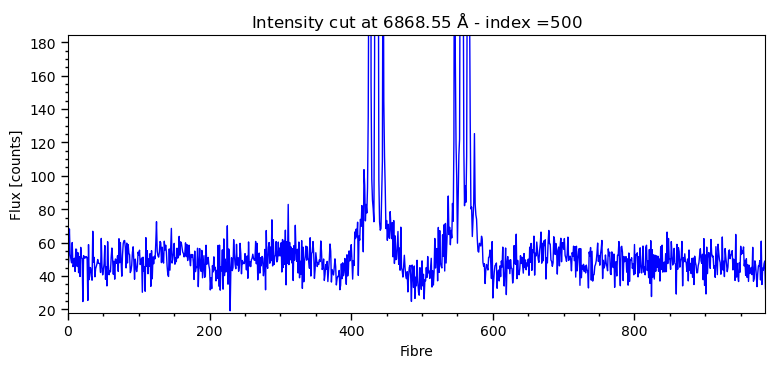

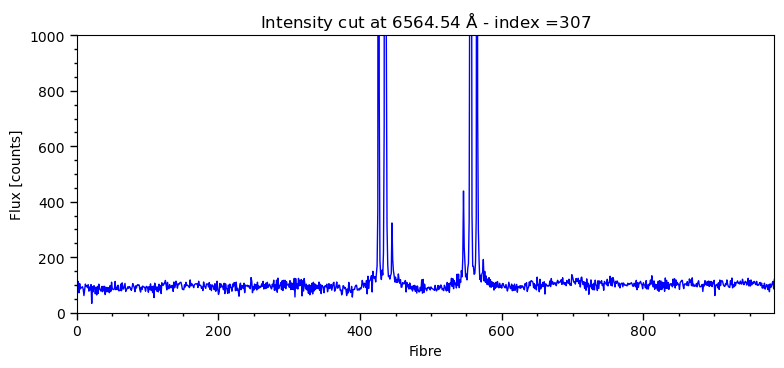

In [19]:
plot_wavelength(run28_red, 500, r=False)          # If wavelength is integer and < wavelength[0], it is an index 
plot_wavelength(run28_red, 6563,                  # This plots the cut closest to 6563, it is in index 307 as says in plot title 
                r=False,
                ymin=0, ymax=1000, extra_y=0)     # Additional plotting adjustments for plot_plot() as kwargs 

 # Plotting RSS images and maps

For plotting the rss image, use task rss_image(), see many options in task. 

By default we use cmap='seismic_r' centered at 0 to check positive values in BLUE and negative values in RED.

Use greyscale = True or greyscale_r = True for plotting in greyscale.

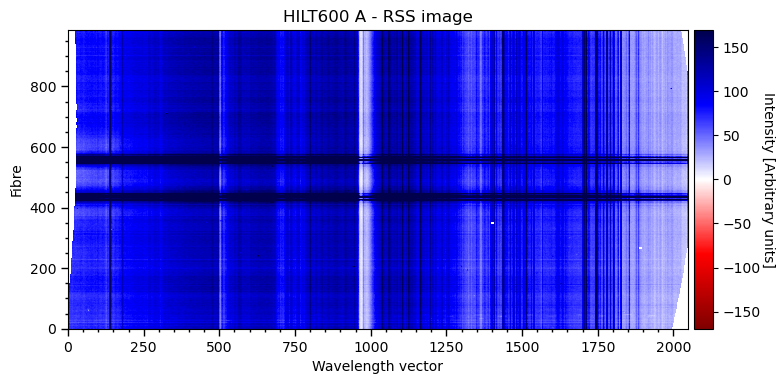

In [33]:
rss_image(run28_red,
          log = False,
          greyscale = False)

It is possible to plot only a subregion:

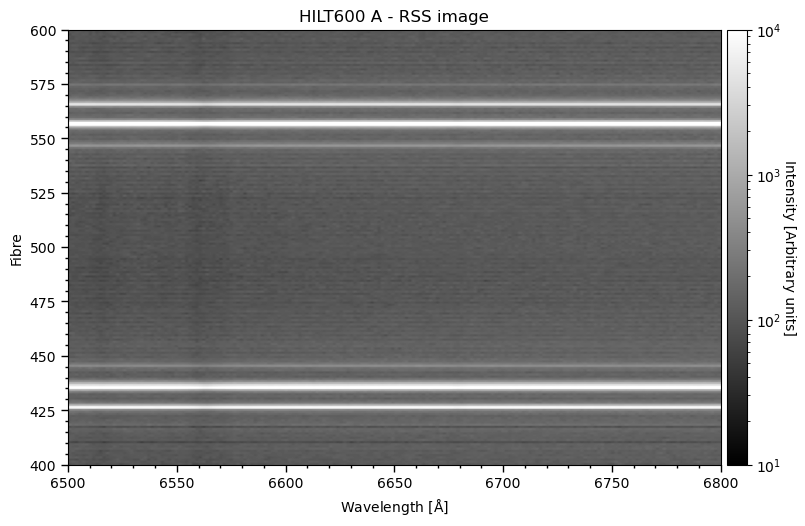

In [41]:
rss_image(run28_red,
          log = True,
          wmin = 6500, wmax = 6800,     # Wavelength range
          fmin = 400, fmax =600,        # Fibre range
          clow = 10, chigh =1E4,        # Color range
          greyscale = True,
          #save_plot_in_file=           # Use this for saving the image in a PNG, PDF file...
          )

The task rss_map() plots a map using the integrated value of each fibre. Many options in task:

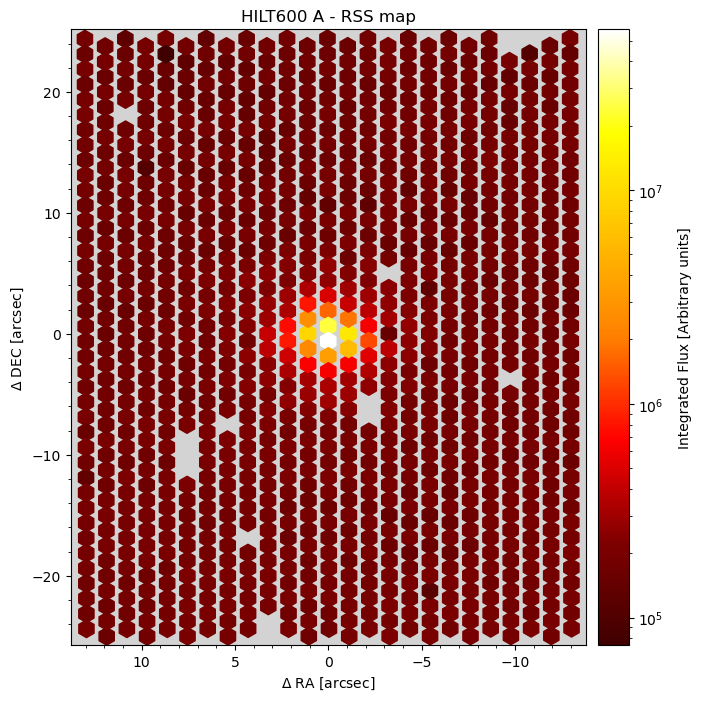

In [42]:
rss_map(run28_red)

# Processing RSS files

RSS files for KOALA in PyKOALA can easily be processed using ONLY ONE task: process_koala_rss(). This task will perform, in order and as requested:

1. Read the file using koalaRSS, creating .koala object and creating mask
2. Applying the throughput correction (T)
3. Correcting CCD defects (for removing some nans) (C)
4. Small wavelength shift correction (W)
5. Atmospheric extinction correction (X)
6. Telluric correction (red arm) (U)
7. Sky subtraction (several methods included) (S)
8. Check negative sky (over-substracting sky if using self sky spectrum) (N)
9. Emission line identification (E)
10. Cleaning sky residuals (R)
11. Cleaning extreme negative values (R)
12. Cleaning bright cosmic rays not deleted by 2dFdr (R)
13. Save your processed RSS data in fits files.

The details of the processing RSS for science or calibration files are included in tutorial 3. 

Below we provide the info of the most important parameters. 
NOTE: As we have not derived any calibration here, only those procedures that do not need them are True, and of course the resulting RSS will not be good (mainly as we have not applied the throughput).


> Processing file /DATA/KOALA/Jacinda/pablo_data/385R/27feb20028red.fits as requested... 
> Applying nearest neighbour interpolation to remove NaN values ...
[Correction: AtmosphericExtinction] Initialising Atm ext. correction model.
[Correction: AtmosphericExtinction] Loading atmospheric extinction model from:
 /DATA/KOALA/Python/Pablo/koala/src/pykoala/corrections/../input_data/observatory_extinction/ssoextinct.dat
[Correction: AtmosphericExtinction] Applying model-based extinction correction to Data Container (1.23 airmass)
> Correcting sky using the self method.
  Using Pablo's method for obtaining self sky spectrum ...
[SkyModel]  Creating SkyModel from input Data Container
[SkyModel]  Estimating sky background contribution...
[SkyModel]  Pre-estimating background using all data
[SkyModel]  Applying sigma-clipping mask (n-sigma=5)
[Correction: SkyCorrection] Applying sky substraction
> Individual correction of fibres with negative sky ... 
  The brightest fibre 556 and faintest f

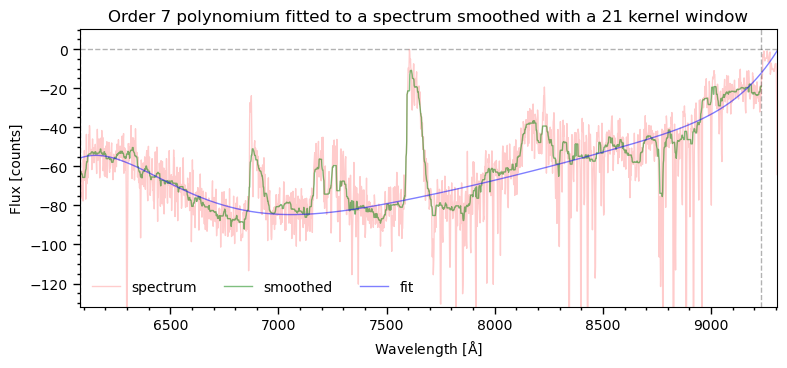

      Using fit to smooth spectrum for correcting the negative sky in fibre 21  ...

- Checking fibre 556 :


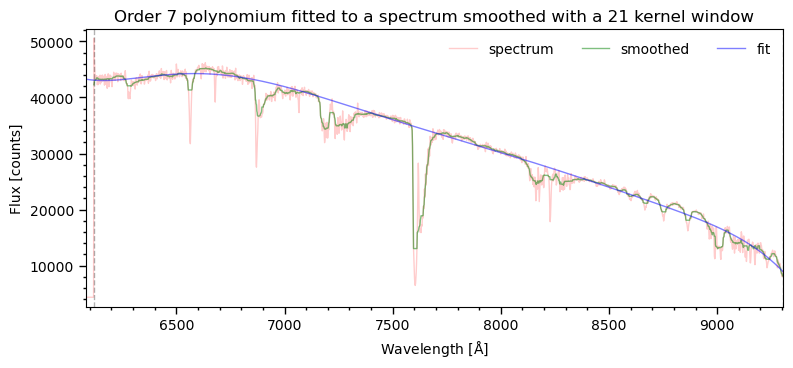

      Fibre 556 does not need to be corrected for negative sky ...
  Corrected 591 fibres for negative sky, 59.94% of fibres.
> Creating continuum image of this rss...
  Checking fibres completed!                             


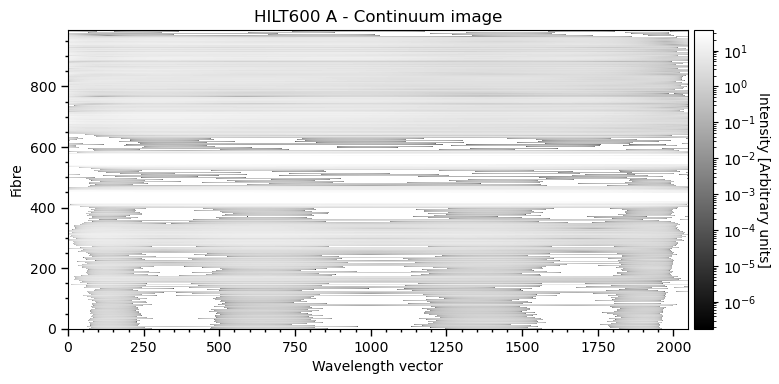


> Correcting the extreme negatives in all fibres, making any pixel below
  np.nanpercentile(intensity_corrected,  0.01 ) =  -80.37
  to have the median value of the fibre...
  Checking fibres completed!



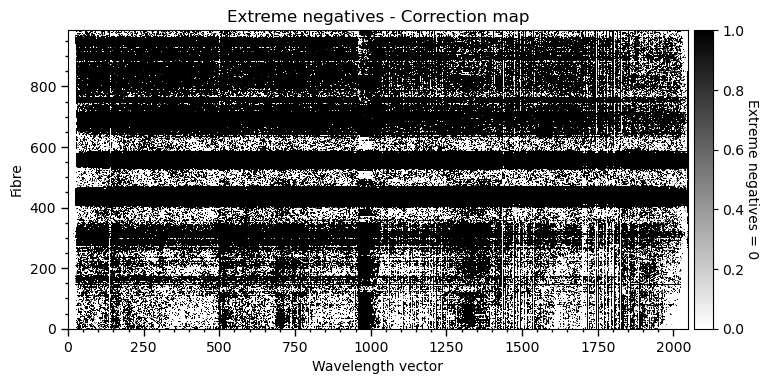


> Finding and killing cosmics in all fibres...
  Checking spectra completed!


  Total number of cosmic candidates found = 9271, correcting only if < 12 per wavelength ...


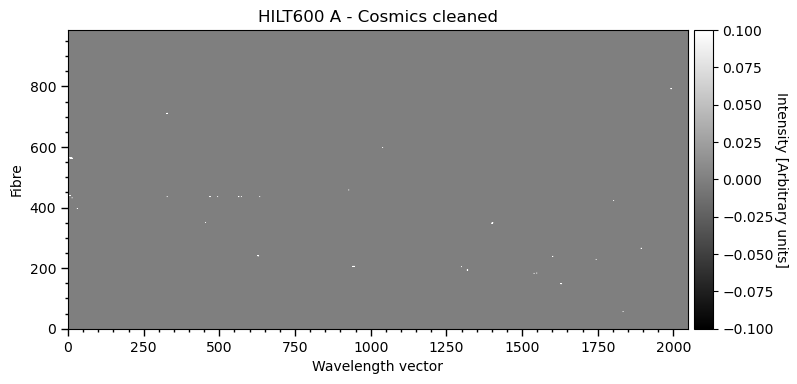

  Total number of cosmics cleaned =  78
> Mask included in rss applied to make nan all bad pixels in edges.


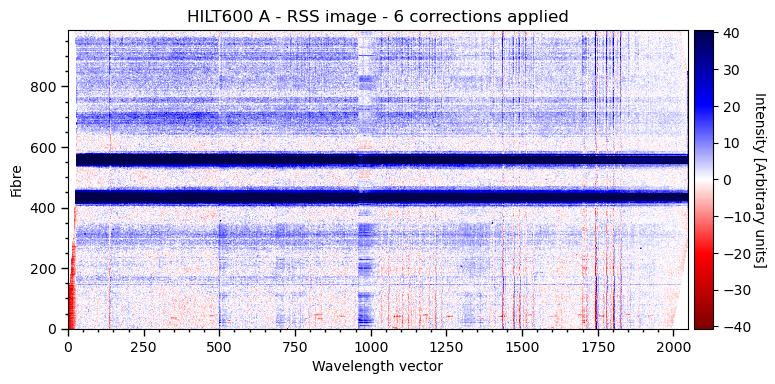


> Summary of processing rss file "/DATA/KOALA/Jacinda/pablo_data/385R/27feb20028red.fits" :
  Name of the observation = "HILT600 A",   Name of this Python RSS object = "run28_red".
  Corrections applied: 6 in total:
  - correct_ccd_defects
  - extinction_correction
  - sky_correction
  - negative_sky_correction
  - correct_extreme_negatives
  - clean_cosmics

  All applied corrections are stored in run28_red.intensity !


In [4]:
run28_red=process_koala_rss(rss_object_name="run28_red",                          # Name of the object to be created
                            rss=run28_red,                                        # rss object, if it has been already created
                            #filename=filename,                                   # name of the .fits file
                            #path = path_to_filename,                             # path to the fits file
                            #calibration_night = calibration_night_385R,          # Object with the calibration of the night, if obtained
                            #save_rss_to_fits_file ="clean",                      # save fits file adding "clean" at the end, e.g. "27feb20028red_clean.fits"
                            apply_throughput = False,                             # (T)
                            #throughput=throughput_2D_red,                        # Throughput correction object, included in calibration_night_385R
                            correct_ccd_defects = True,                           # (C)
                            fix_wavelengths = False,                              # (W)
                            #wavelength_shift_correction = wavelength_shift_correction,   # wavelength shift correction object, included in calibration_night_385R 
                            correct_for_extinction = True,                        # (X)
                            apply_telluric_correction=False,                      # (U)
                            #telluric_correction = telluric_correction,           # Telluric correction object, included in calibration_night_385R
                            sky_method = "self",                                  # Sky method to use, in this case using fibres from rss itself
                            correct_negative_sky=True,                            # (N)
                            id_el = False,                                        # (E)  
                            big_telluric_residua_correction = False,              # (R)
                            telluric_residua_at_6860_correction = False,          # (R)
                            correct_extreme_negatives = True,                     # (R)
                            percentile_min_for_extreme_negatives = 0.01,          # As it says
                            clean_cosmics=True,                                   # (R) 
                            only_plot_cosmics_cleaned = True,                     # As it says  

                            verbose_counter = False,                              # Counter does not work on Jypiter
                            plot_final_rss=True, warnings=True, plot = True, verbose = True        # This plots and verbose everything
                            #plot_final_rss=False, warnings=False, plot = False, verbose = False   # This does not plot or verbose (default)
                            )

# process_koala_rss() with all the options

In [ ]:
# Set obs_number to be read
obs_number = 32 #31-36  galaxy He2-10

# Set variable "filename" just with the info of the file (it does not include the path in this example)
filename = f"{date}{aaomega_arms[arm]}00{obs_number}red.fits"     

run32_red=process_koala_rss(rss_object_name="run32_red",                          # Name of the object to be created
                            filename=filename,                                    # name of the .fits file to use
                            path = path_to_filename,                              # path to fits file
                            calibration_night = calibration_night_385R,           # Object with the calibration of the night                        
                            apply_throughput = True,                              # (T)  
                            #throughput=throughput_2D_red,                        # Throughput object, included in calibration_night_385R
                            correct_ccd_defects = True,                           # (C)
                            fix_wavelengths = True,                               # (W)
                            #wavelength_shift_correction = wavelength_shift_correction,   # wavelength shift correction object, included in calibration_night_385R 
                            correct_for_extinction = True,                        # (X)
                            apply_telluric_correction=True,                       # (U)
                            #telluric_correction = telluric_correction,           # Telluric correction object, included in calibration_night_385R
 
                            sky_method = "selffit",                                         # (S) Using the same rss and fitting Gaussians to skylines in each fibre
                            n_sky = 25,                                                     # Using the 25 fibres with lowest intensity...          
                            sky_wave_min=6960,                                              # ... between 6960 ..
                            sky_wave_max=7220,                                              # ... and 7220
                            bright_emission_lines_to_substract_in_sky = [6584],             # List with bright emission lines to substract in sky, typically H-alpha
                            list_of_skylines_to_fit_near_bright_emission_lines = [[6577]],  # List with lists of adjacent skylines we have to consider close to bright emission lines
                            fix_edges = True,                                               # Use information in the rss to fix the red/blue edges in sky spectrum if needed
 
                            correct_negative_sky = True,                  # (N) Check fibres for negative sky
                            id_el = True,                                 # (E) Identify emission lines in combined spectrum of rss
                            big_telluric_residua_correction = True,       # (R) # Fix residua of the big telluric absorption at ~7600 A 
                            correct_extreme_negatives = True,             # (R) Correct for extreme negatives
                            percentile_min_for_extreme_negatives = 0.05,  # Percentile below which extreme negative will be corrected
                            clean_cosmics = True,                         # (R) Clean cosmics
                            max_number_of_cosmics_per_fibre = 15,         # Max number of cosmics to clean per fibre or wavelength, if more than this it does not correct anything.
                            only_plot_cosmics_cleaned = True,             # The only plot that this task will provide, default is False, but use True for minimizing plotting
                              
                            verbose_counter = False,                                               # Counter does not work on Jypiter
                            plot_final_rss=True, warnings=False, plot = True, verbose = True       # This plots and verbose everything
                            #plot_final_rss=False, warnings=False, plot = False, verbose = False   # This does not plot or verbose (default)
                            )